In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import pyccl as ccl
import scipy.stats as stats
import scipy.integrate as integ
import scipy.optimize as opt
import scipy.special as spec
from scipy.misc import derivative
import sympy as sp
import pandas as pd
import numpy as np
import re
import emcee
import os
import time
import timeit

#number of bin and multipoles
bin_l = 20
bin_euclid=13
#muktipoles logarithmic array and difference definition
ell = np.geomspace(2, 2000, bin_l)
delta_ell = np.empty([bin_l])
delta_ell[1:bin_l] = -ell[0:bin_l-1] + ell[1:bin_l]
delta_ell[0]=ell[0]
#redshift e bin data loading
#euclid total
#bin normalization and nz values
norm_tot= np.zeros(bin_euclid)
nz_tot= np.zeros([bin_euclid,1000])
#redshift and noramlization values
z_eff= np.zeros(bin_euclid)
z_euclid = np.loadtxt("/home/ms20062/try/data/nofzs/nofz_13_bins_EP_24.5_maxmag_0.2_2.5_zmin_zmax.txt", delimiter="\t", usecols=0)
norm_tot= np.loadtxt("/home/ms20062/try/data/nofzs/nofz_13_bins_EP_24.5_maxmag_0.2_2.5_zmin_zmax_number_densities.txt")
#galaxy bias for nz total
bias_tot= np.loadtxt("/home/ms20062/try/data/nofzs/nofz_13_bins_EP_24.5_maxmag_0.2_2.5_zmin_zmax_galaxy_bias.txt",usecols=1)
for i in range(bin_euclid):
    nz_tot[i,:]=np.loadtxt("/home/ms20062/try/data/nofzs/nofz_13_bins_EP_24.5_maxmag_0.2_2.5_zmin_zmax.txt", delimiter="\t", usecols=i+1)
#euclid red
#bin normalization and nz values
norm_red= np.zeros(bin_euclid)
nz_red= np.zeros([bin_euclid,1000])
#redshift and noramlization values
z_euclid = np.loadtxt("/home/ms20062/try/data/nofzs/nofz_red_13_bins_EP_24.5_maxmag_0.2_2.5_zmin_zmax.txt", delimiter="\t", usecols=0)
norm_red= np.loadtxt("/home/ms20062/try/data/nofzs/nofz_red_13_bins_EP_24.5_maxmag_0.2_2.5_zmin_zmax_number_densities.txt")
#galaxy bias for nz red
bias_red= np.loadtxt("/home/ms20062/try/data/nofzs/nofz_red_13_bins_EP_24.5_maxmag_0.2_2.5_zmin_zmax_galaxy_bias.txt",usecols=1)
for i in range(bin_euclid):
    nz_red[i,:]=np.loadtxt("/home/ms20062/try/data/nofzs/nofz_red_13_bins_EP_24.5_maxmag_0.2_2.5_zmin_zmax.txt", delimiter="\t", usecols=i+1)
#euclid blue
#bin normalization and nz values
norm_blue= np.zeros(bin_euclid)
nz_blue= np.zeros([bin_euclid,1000])
#redshift and noramlization values
z_euclid = np.loadtxt("/home/ms20062/try/data/nofzs/nofz_blue_13_bins_EP_24.5_maxmag_0.2_2.5_zmin_zmax.txt", delimiter="\t", usecols=0)
norm_blue= np.loadtxt("/home/ms20062/try/data/nofzs/nofz_blue_13_bins_EP_24.5_maxmag_0.2_2.5_zmin_zmax_number_densities.txt")
#galaxy bias for nz red
bias_blue= np.loadtxt("/home/ms20062/try/data/nofzs/nofz_blue_13_bins_EP_24.5_maxmag_0.2_2.5_zmin_zmax_galaxy_bias.txt",usecols=1)
for i in range(bin_euclid):
    nz_blue[i,:]=np.loadtxt("/home/ms20062/try/data/nofzs/nofz_blue_13_bins_EP_24.5_maxmag_0.2_2.5_zmin_zmax.txt", delimiter="\t", usecols=i+1)



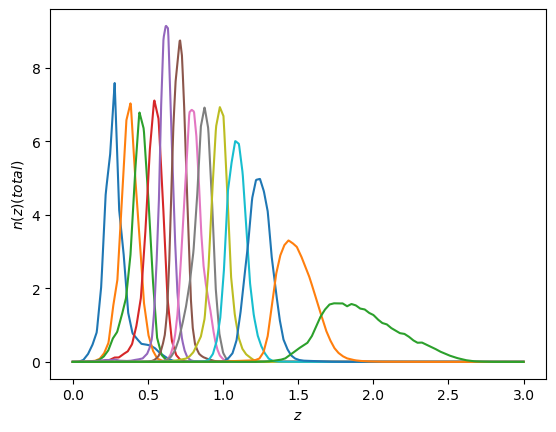

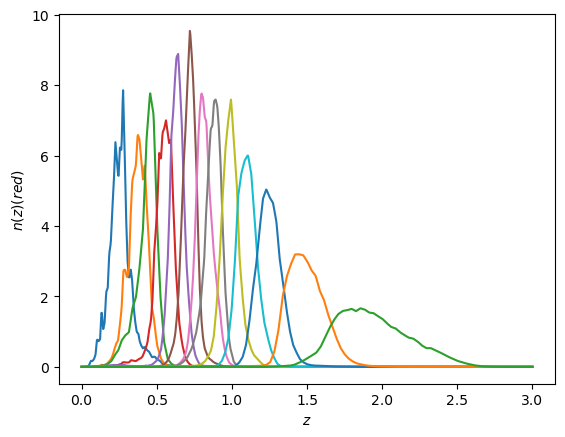

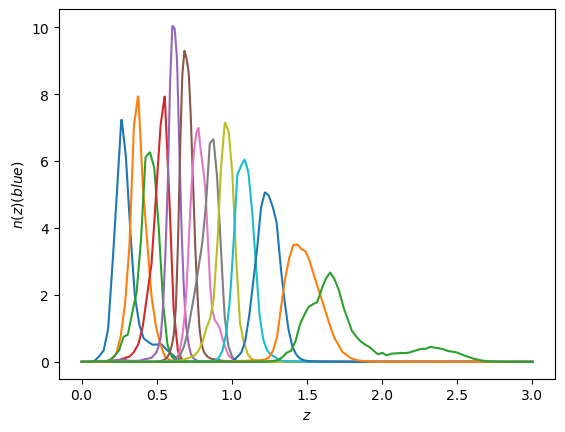

In [5]:
# plots of the nz in the three cases
for i in range(bin_euclid):
        plt.plot(z_euclid, nz_tot[i,:])
plt.xlabel(r'$z$')
plt.ylabel(r'$n(z)(total)$')
plt.savefig("IA_nz_tot.jpg")
plt.show()

for i in range(bin_euclid):
        plt.plot(z_euclid, nz_red[i,:])
plt.xlabel(r'$z$')
plt.ylabel(r'$n(z)(red)$')
plt.savefig("IA_nz_red.jpg")
plt.show()

for i in range(bin_euclid):
        plt.plot(z_euclid, nz_blue[i,:])
plt.xlabel(r'$z$')
plt.ylabel(r'$n(z)(blue)$')
plt.savefig("IA_nz_blue.jpg")
plt.show()



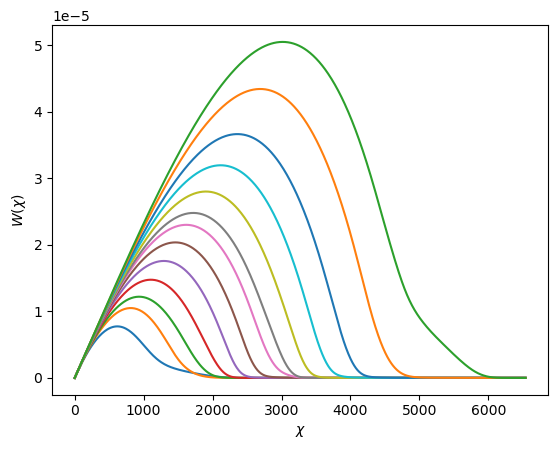

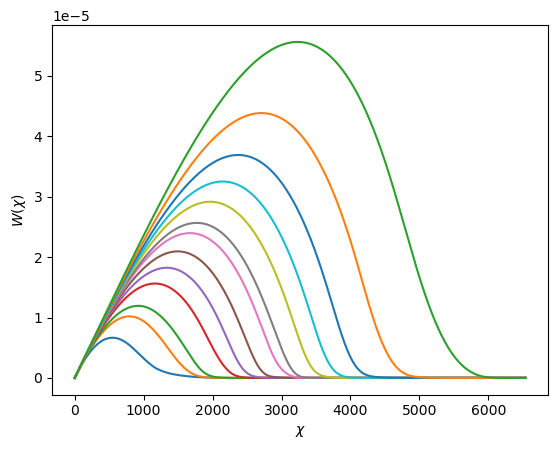

In [6]:
#Non biased weak lensing kernels function
cosmo = ccl.Cosmology(Omega_c=0.27,
                      Omega_b=0.045,
                      h=0.67,
                      n_s=0.96,
                      sigma8=0.83,
                      transfer_function='boltzmann_camb')

btracerblue = [0]*bin_euclid
btracerred = [0]*bin_euclid
for i in range(bin_euclid):
    btracerblue[i] = ccl.get_lensing_kernel(cosmo, dndz=(z_euclid, nz_blue[i]))
    btracerred[i] = ccl.get_lensing_kernel(cosmo, dndz=(z_euclid, nz_red[i]))

#plots of tthe kernels function
for i in range(bin_euclid):
    plt.plot(btracerblue[i][0], btracerblue[i][1])
plt.xlabel(r'$\chi$')
plt.ylabel(r'$W(\chi)$')
plt.show()


for i in range(bin_euclid):
    plt.plot(btracerred[i][0], btracerred[i][1])
plt.xlabel(r'$\chi$')
plt.ylabel(r'$W(\chi)$')
plt.show()



In [7]:
#sky fractions
fsky_eu = 0.36
#variance of the observed ellipticities
se = 0.3
# IAs parameters fiducial values
eta_red = 0.
eta_blue = 0.
z_pivot=0.62
A_red=2.15
A_blue=0.03
C_1=5e-14
#Comsmological paramneter fiducial values
Oc=0.27
s8=0.83
Omega_b=0.045
h = 0.67
n_s = 0.96
w0 = -1.0
wa = 0.0
# Cl angular power spectra calculator
def cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue):
    cosmo = ccl.Cosmology(Omega_c=Oc,
                      Omega_b = Omega_b,
                      h=h,
                      n_s=n_s,
                      sigma8=s8,
                      w0 = w0,
                      wa = wa,
                      transfer_function='boltzmann_camb',
                      extra_parameters = {"camb": {"dark_energy_model": "ppf"}})
    D= ccl.growth_factor(cosmo, 1./(1+z_euclid))
    rho_m = ccl.physical_constants.RHO_CRITICAL * (cosmo['Omega_c']+cosmo['Omega_b'])
    Az_red =  A_red* C_1 * (rho_m / D)*((1+z_euclid)/(1+z_pivot))**eta_red
    Az_blue = 5.*A_blue* C_1 * (rho_m / (D**2))*((1+z_euclid)/(1+z_pivot))**eta_blue
    zeros_l = np.zeros(bin_l)
    clbtracer_eu_blue = np.array([ ccl.WeakLensingTracer(cosmo, dndz=(z_euclid, nz_blue[i,:]), ia_bias=(z_euclid, Az_blue), use_A_ia=False) for i in range(bin_euclid)])
    clbtracer_eu_red = np.array([ ccl.WeakLensingTracer(cosmo, dndz=(z_euclid, nz_red[i,:]), ia_bias=(z_euclid, Az_red), use_A_ia=False) for i in range(bin_euclid)])
    clbtracer = np.concatenate((clbtracer_eu_blue,clbtracer_eu_red))

    clij_smart = np.array([ [
        ccl.angular_cl(cosmo, clbtracer[i], clbtracer[j], ell)
        if j<=i else np.zeros(bin_l)
        for j in range(bin_euclid*2) ] for i in range(bin_euclid*2) ]).T
    clij_smart += np.triu(clij_smart, 1).transpose(0, 2, 1)
    return clij_smart

clij_smart= cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue)
# noise and variance coefficient calculation
zeros_matrix = np.zeros([bin_l,bin_euclid,bin_euclid])
ones_matrix = np.ones([bin_l,bin_euclid,bin_euclid])
noise_blue= (se**2/((norm_blue*(60.*180./(np.pi))**2.)))
noise_red= (se**2/((norm_red*(60.*180./(np.pi))**2.)))
noise_matrix_blue= np.zeros((bin_euclid,bin_euclid), float)
noise_matrix_red= np.zeros((bin_euclid,bin_euclid), float)
np.fill_diagonal(noise_matrix_blue, noise_blue)
np.fill_diagonal(noise_matrix_red, noise_red)
noise_matrix_blue = np.array([ noise_matrix_blue for l in range(bin_l)])
noise_matrix_red = np.array([ noise_matrix_red for l in range(bin_l)])

noise = np.block([

             [noise_matrix_blue[:],                 zeros_matrix[:]],

             [zeros_matrix[:],                  noise_matrix_red[:]]

             ])
coeff =  np.block([

             [ones_matrix[:]*np.sqrt(2./((2.*ell[:, None, None]+1.)*delta_ell[:, None, None]*fsky_eu)),                 ones_matrix[:]*np.sqrt(2./((2.*ell[:, None, None]+1.)*delta_ell[:, None, None]*fsky_eu))],

             [ones_matrix[:]*np.sqrt(2./((2.*ell[:, None, None]+1.)*delta_ell[:, None, None]*fsky_eu)),                 ones_matrix[:]*np.sqrt(2./((2.*ell[:, None, None]+1.)*delta_ell[:, None, None]*fsky_eu))]

             ])


# Cl flattening and covariance matrix calculation
clij_smart_flat = np.array([[clij_smart[l,i,j] for i in range(bin_euclid*2) for j in range(i,bin_euclid*2) ]for l in range(bin_l)])
aij = np.array([coeff[l,:,:]*(clij_smart[l,:,:]+noise[l,:,:]) for l in range(bin_l)])

inv_aij =  np.array([ np.linalg.inv(aij[l,:,:]) for l in range(bin_l) ])
sigma = np.array([[0.5*aij[:,i,k]*aij[:,j,l] + 0.5*aij[:,i,l]*aij[:,j,k] for i in range(bin_euclid*2) for j in range(i,bin_euclid*2)] for k in range(bin_euclid*2) for l in range(k,bin_euclid*2)])
inv_sigma = np.array([np.linalg.inv(sigma[:,:,l]) for l in range(bin_l) ])



In [8]:
#Derivatives
# IAs parameter analytical derivaties
dCldA_blue1= cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,1.,eta_red,eta_blue)
dCldA_red1= cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,1.,A_blue,eta_red,eta_blue)
def dCldeta_red(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue):
    cosmo = ccl.Cosmology(Omega_c=Oc,
        Omega_b=Omega_b,
        h=h,
        n_s=n_s,
        sigma8=s8,
        w0 = w0,
        wa = wa,
        transfer_function='boltzmann_camb',
        extra_parameters = {"camb": {"dark_energy_model": "ppf"}})
    D= ccl.growth_factor(cosmo, 1./(1+z_euclid))
    rho_m = ccl.physical_constants.RHO_CRITICAL * (cosmo['Omega_c']+cosmo['Omega_b'])
    Az_red = np.log((1+z_euclid)/(1+z_pivot))*A_red* C_1 * (rho_m / D)*((1+z_euclid)/(1+z_pivot))**eta_red
    Az_blue = 5.*A_blue* C_1 * (rho_m / (D**2))*((1+z_euclid)/(1+z_pivot))**eta_blue
    zeros_l = np.zeros(bin_l)
    clbtracer_eu_blue = np.array([ ccl.WeakLensingTracer(cosmo, dndz=(z_euclid, nz_blue[i,:]), ia_bias=(z_euclid, Az_blue), use_A_ia=False) for i in range(bin_euclid)])
    clbtracer_eu_red = np.array([ ccl.WeakLensingTracer(cosmo, dndz=(z_euclid, nz_red[i,:]), ia_bias=(z_euclid, Az_red), use_A_ia=False) for i in range(bin_euclid)])
    clbtracer = np.concatenate((clbtracer_eu_blue,clbtracer_eu_red))

    dclij_smart = np.array([ [
        ccl.angular_cl(cosmo, clbtracer[i], clbtracer[j], ell)
        if j<=i else np.zeros(bin_l)
        for j in range(bin_euclid*2) ] for i in range(bin_euclid*2) ]).T
    dclij_smart += np.triu(dclij_smart, 1).transpose(0, 2, 1)
    return dclij_smart

def dCldeta_blue(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue):
    cosmo = ccl.Cosmology(Omega_c=Oc,
        Omega_b=Omega_b,
        h=h,
        n_s=n_s,
        sigma8=s8,
        w0 = w0,
        wa = wa,
        transfer_function='boltzmann_camb',
        extra_parameters = {"camb": {"dark_energy_model": "ppf"}})
    D= ccl.growth_factor(cosmo, 1./(1+z_euclid))
    rho_m = ccl.physical_constants.RHO_CRITICAL * (cosmo['Omega_c']+cosmo['Omega_b'])
    Az_red = A_red* C_1 * (rho_m / D)*((1+z_euclid)/(1+z_pivot))**eta_red
    Az_blue = np.log((1+z_euclid)/(1+z_pivot))*5.*A_blue* C_1 * (rho_m / (D**2))*((1+z_euclid)/(1+z_pivot))**eta_blue
    zeros_l = np.zeros(bin_l)
    clbtracer_eu_blue = np.array([ ccl.WeakLensingTracer(cosmo, dndz=(z_euclid, nz_blue[i,:]), ia_bias=(z_euclid, Az_blue), use_A_ia=False) for i in range(bin_euclid)])
    clbtracer_eu_red = np.array([ ccl.WeakLensingTracer(cosmo, dndz=(z_euclid, nz_red[i,:]), ia_bias=(z_euclid, Az_red), use_A_ia=False) for i in range(bin_euclid)])
    clbtracer = np.concatenate((clbtracer_eu_blue,clbtracer_eu_red))

    dclij_smart = np.array([ [
        ccl.angular_cl(cosmo, clbtracer[i], clbtracer[j], ell)
        if j<=i else np.zeros(bin_l)
        for j in range(bin_euclid*2) ] for i in range(bin_euclid*2) ]).T
    dclij_smart += np.triu(dclij_smart, 1).transpose(0, 2, 1)
    return dclij_smart
dCldeta_blue1 = dCldeta_blue(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue)
dCldeta_red1 = dCldeta_red(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue)


In [9]:
#Cosmological parameter numerical derivaties
def dCldOc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,dOc):
    dclij_smart= (-cl_calc(Oc+2.*dOc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue)+8.*cl_calc(Oc+dOc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue) -8.*cl_calc(Oc-dOc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue)+cl_calc(Oc-2.*dOc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue))/(12.*dOc)
    return dclij_smart
def dClds8(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,ds8):
    dclij_smart= (-cl_calc(Oc,s8+2.*ds8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue)+8.*cl_calc(Oc,s8+ds8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue) -8.*cl_calc(Oc,s8-ds8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue)+cl_calc(Oc,s8-2.*ds8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue))/(12.*ds8)
    return dclij_smart

def dCldOb(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,dOb):
    dclij_smart= (-cl_calc(Oc,s8,Omega_b+2.*dOb,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue)+8.*cl_calc(Oc,s8,Omega_b+dOb,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue) -8.*cl_calc(Oc,s8,Omega_b-dOb,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue)+cl_calc(Oc,s8,Omega_b-2.*dOb,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue))/(12.*dOb)
    return dclij_smart

def dCldh(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,dh):
    dclij_smart= (-cl_calc(Oc,s8,Omega_b,h+2.*dh,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue)+8.*cl_calc(Oc,s8,Omega_b,h+dh,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue) -8.*cl_calc(Oc,s8,Omega_b,h-dh,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue)+cl_calc(Oc,s8,Omega_b,h-2.*dh,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue))/(12.*dh)
    return dclij_smart

def dCldns(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,dns):
    dclij_smart= (-cl_calc(Oc,s8,Omega_b,h,n_s+2.*dns,w0,wa,A_red,A_blue,eta_red,eta_blue)+8.*cl_calc(Oc,s8,Omega_b,h,n_s + dns,w0,wa,A_red,A_blue,eta_red,eta_blue) -8.*cl_calc(Oc,s8,Omega_b,h,n_s - dns,w0,wa,A_red,A_blue,eta_red,eta_blue)+cl_calc(Oc,s8,Omega_b,h,n_s-2.*dns,w0,wa,A_red,A_blue,eta_red,eta_blue))/(12.*dns)
    return dclij_smart

def dCldw0(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,dw0):
    dclij_smart= (-cl_calc(Oc,s8,Omega_b,h,n_s,w0+2.*dw0,wa,A_red,A_blue,eta_red,eta_blue)+8.*cl_calc(Oc,s8,Omega_b,h,n_s,w0 + dw0,wa,A_red,A_blue,eta_red,eta_blue) -8.*cl_calc(Oc,s8,Omega_b,h,n_s,w0 - dw0,wa,A_red,A_blue,eta_red,eta_blue)+cl_calc(Oc,s8,Omega_b,h,n_s,w0-2.*dw0,wa,A_red,A_blue,eta_red,eta_blue))/(12.*dw0)
    return dclij_smart

def dCldwa(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,dwa):
    dclij_smart= (-cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa+2.*dwa,A_red,A_blue,eta_red,eta_blue)+8.*cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa + dwa,A_red,A_blue,eta_red,eta_blue) -8.*cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa - dwa,A_red,A_blue,eta_red,eta_blue)+cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa-2.*dwa,A_red,A_blue,eta_red,eta_blue))/(12.*dwa)
    return dclij_smart

relvar=0.00625
dCldOc=dCldOc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,relvar)
dCldOb=dCldOb(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,relvar)
dClds8=dClds8(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,relvar)
dCldh=dCldh(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,relvar)
dCldns=dCldns(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,relvar)
relvar=0.025
dCldw0=dCldw0(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,relvar)
dCldwa=dCldwa(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,relvar)

#IAs parameter numerical derivaties
def dCldeta_red(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,deta_red):
    dclij_smart= (-cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red+2.*deta_red,eta_blue)+8.*cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red+deta_red,eta_blue) -8.*cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red-deta_red,eta_blue)+cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red-2.*deta_red,eta_blue))/(12.*deta_red)
    return dclij_smart
def dCldeta_blue(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,deta_blue):
    dclij_smart= (-cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue+2.*deta_blue)+8.*cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue+deta_blue) -8.*cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue-deta_blue)+cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue-2.*deta_blue))/(12.*deta_blue)
    return dclij_smart
def dCldA_red(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,dA_red):
    dclij_smart= (-cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red+2.*dA_red,A_blue,eta_red,eta_blue)+8.*cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red+dA_red,A_blue,eta_red,eta_blue) -8.*cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red-dA_red,A_blue,eta_red,eta_blue)+cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red-2.*dA_red,A_blue,eta_red,eta_blue))/(12.*dA_red)
    return dclij_smart
def dCldA_blue(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,dA_blue):
    dclij_smart= (-cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue+2.*dA_blue,eta_red,eta_blue)+8.*cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue+dA_blue,eta_red,eta_blue) -8.*cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue-dA_blue,eta_red,eta_blue)+cl_calc(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue-2.*dA_blue,eta_red,eta_blue))/(12.*dA_blue)
    return dclij_smart
relvar=0.000625
dCldeta_blue =dCldeta_blue(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,relvar)
dCldeta_red =dCldeta_red(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,relvar)
dCldA_blue =dCldA_blue(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,relvar)
dCldA_red =dCldA_red(Oc,s8,Omega_b,h,n_s,w0,wa,A_red,A_blue,eta_red,eta_blue,relvar)



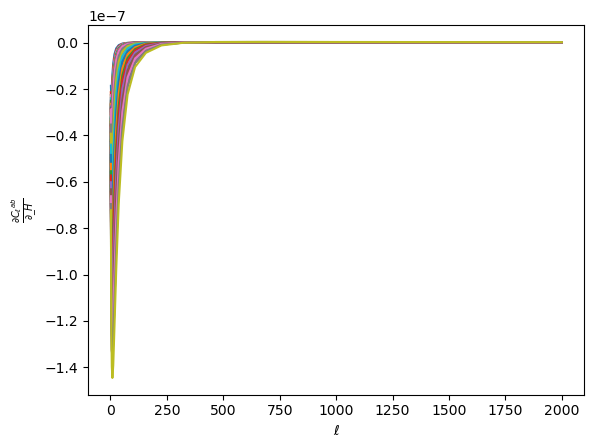

In [10]:
for i in range(bin_euclid):
    for j in range(bin_euclid):
        plt.plot(ell, dCldh[:,i,j])
        
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\frac{{\partial C_\ell}^{ab}}{\partial \_H}$')
plt.show()

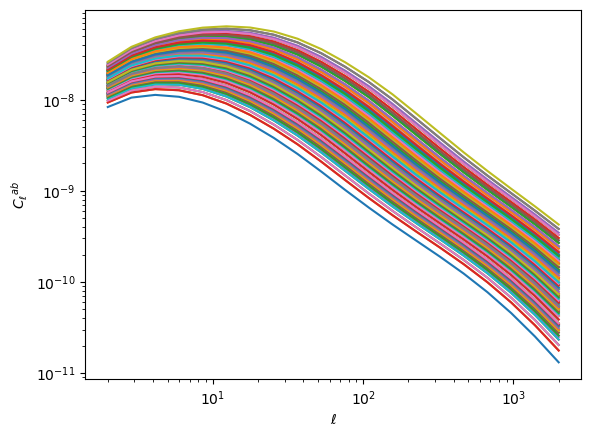

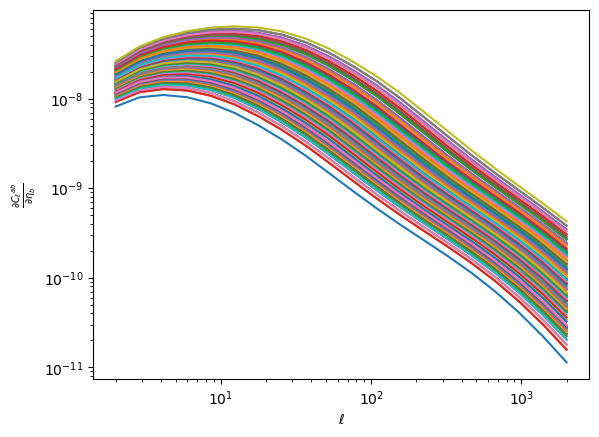

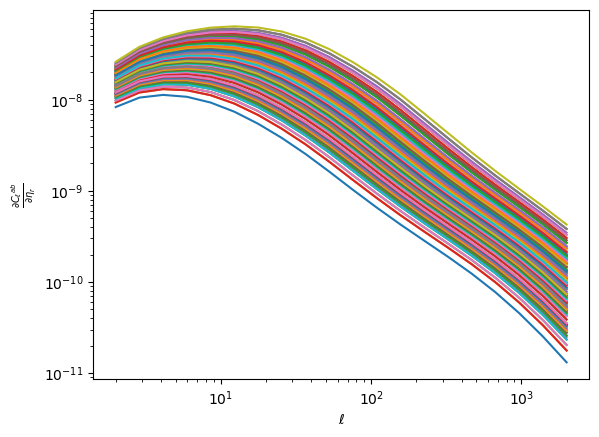

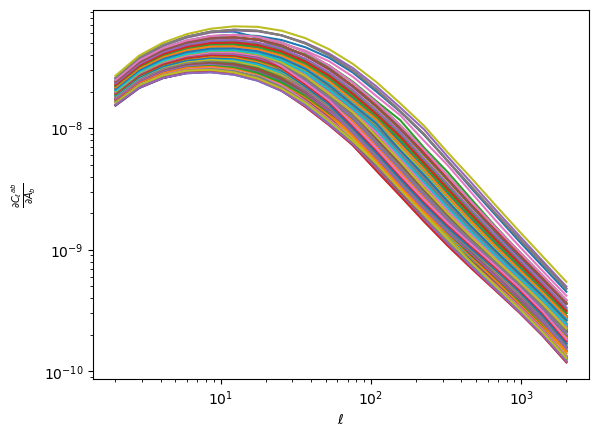

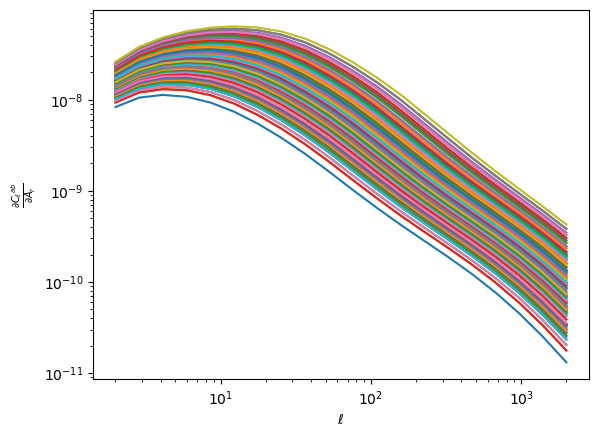

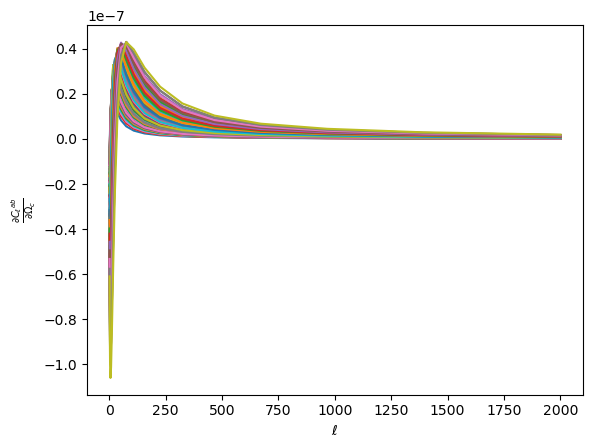

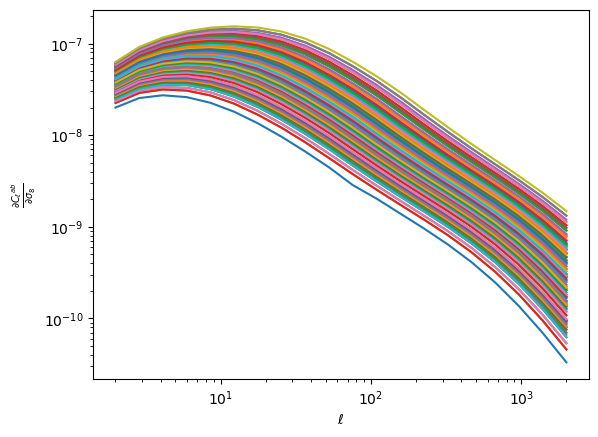

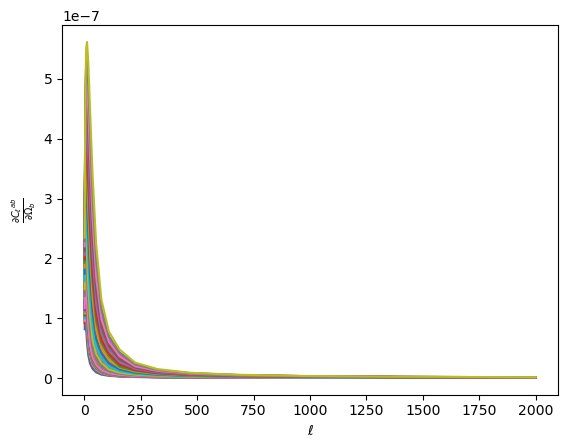

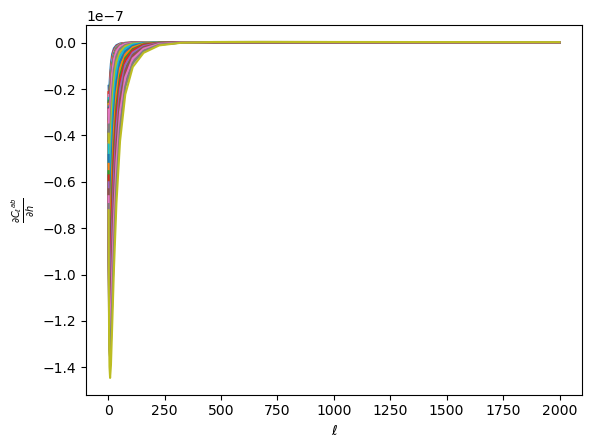

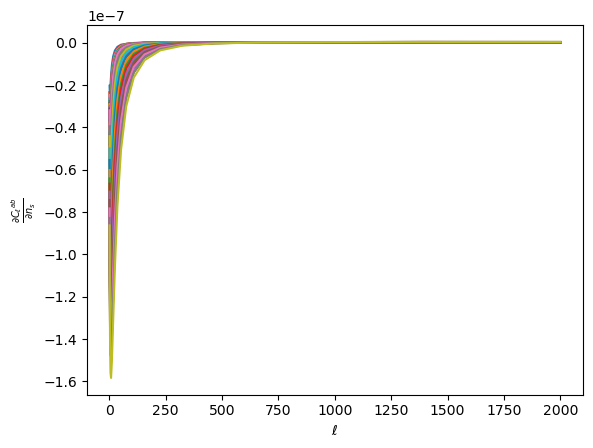

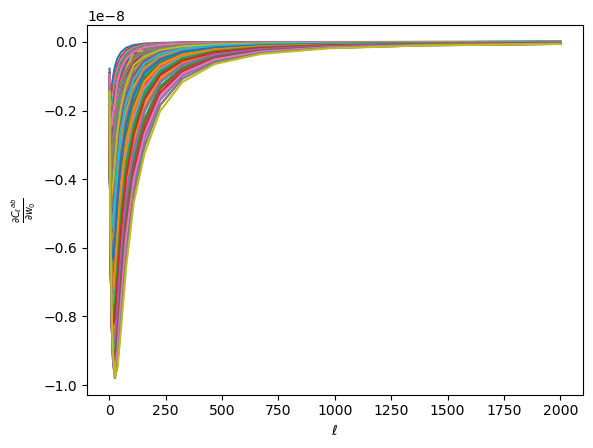

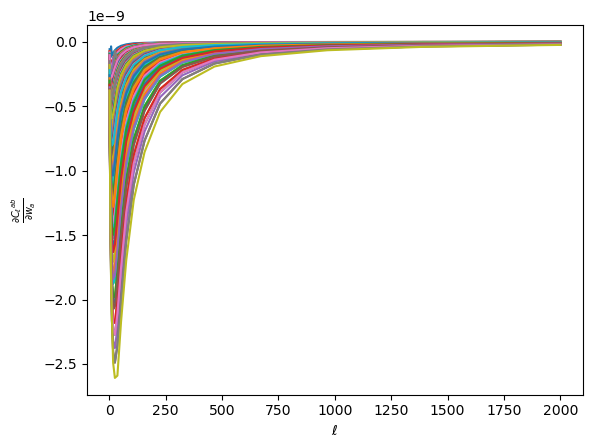

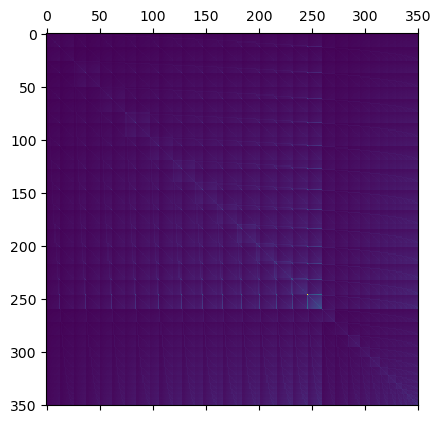

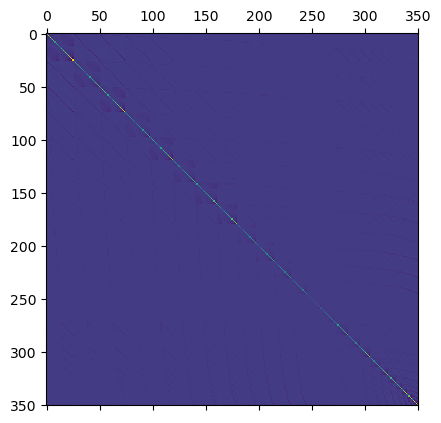

In [11]:
#Derivaties plots
for i in range(bin_euclid):
    for j in range(bin_euclid):
        plt.loglog(ell, clij_smart[:,i,j])

plt.xlabel(r'$\ell$')
plt.ylabel(r'${C_\ell}^{ab}$')
plt.show()

for i in range(bin_euclid):
    for j in range(bin_euclid):
        plt.loglog(ell, dCldeta_blue1[:,i,j])

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\frac{{\partial C_\ell}^{ab}}{\partial \eta_b}$')
plt.show()

for i in range(bin_euclid):
    for j in range(bin_euclid):
        plt.loglog(ell, dCldeta_red1[:,i,j])

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\frac{{\partial C_\ell}^{ab}}{\partial \eta_r}$')
plt.show()


for i in range(bin_euclid):
    for j in range(bin_euclid):
        plt.loglog(ell, dCldA_blue1[:,i,j])

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\frac{{\partial C_\ell}^{ab}}{\partial A_b}$')
plt.show()

for i in range(bin_euclid):
    for j in range(bin_euclid):
        plt.loglog(ell, dCldA_red1[:,i,j])

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\frac{{\partial C_\ell}^{ab}}{\partial A_r}$')
plt.show()

for i in range(bin_euclid):
    for j in range(bin_euclid):
        plt.plot(ell, dCldOc[:,i,j])

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\frac{{\partial C_\ell}^{ab}}{\partial \Omega_c}$')
plt.show()

for i in range(bin_euclid):
    for j in range(bin_euclid):
        plt.loglog(ell, dClds8[:,i,j])

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\frac{{\partial C_\ell}^{ab}}{\partial \sigma_8}$')
plt.show()

for i in range(bin_euclid):
    for j in range(bin_euclid):
        plt.plot(ell, dCldOb[:,i,j])

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\frac{{\partial C_\ell}^{ab}}{\partial \Omega_b}$')
plt.show()

for i in range(bin_euclid):
    for j in range(bin_euclid):
        plt.plot(ell, dCldh[:,i,j])
        
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\frac{{\partial C_\ell}^{ab}}{\partial h}$')
plt.show()

for i in range(bin_euclid):
    for j in range(bin_euclid):
        plt.plot(ell, dCldns[:,i,j])
        
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\frac{{\partial C_\ell}^{ab}}{\partial n_s}$')
plt.show()

for i in range(bin_euclid):
    for j in range(bin_euclid):
        plt.plot(ell, dCldw0[:,i,j])
        
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\frac{{\partial C_\ell}^{ab}}{\partial w_0}$')
plt.show()

for i in range(bin_euclid):
    for j in range(bin_euclid):
        plt.plot(ell, dCldwa[:,i,j])
        
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\frac{{\partial C_\ell}^{ab}}{\partial w_a}$')
plt.show()


#covatiance and inverse covariance plots
plt.matshow(sigma[:,:,0])
plt.matshow(inv_sigma[0,:,:])



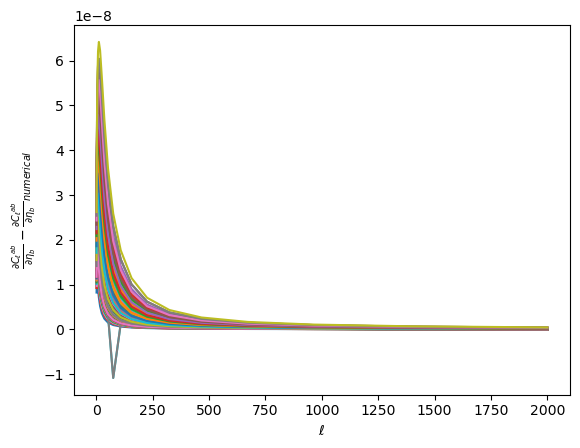

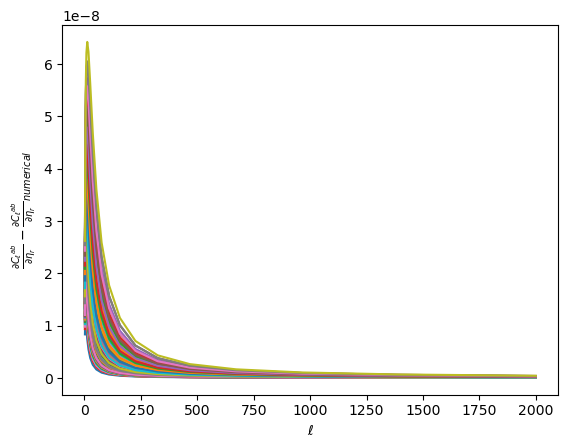

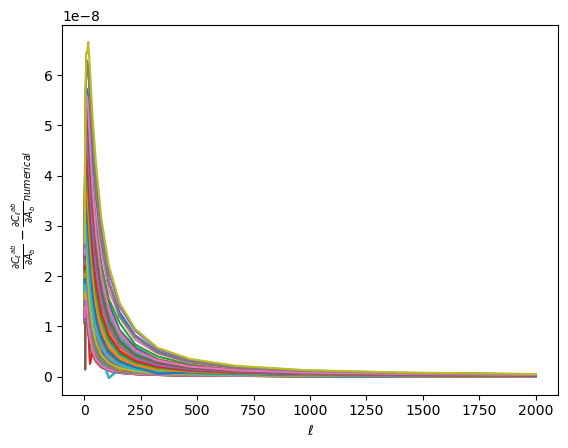

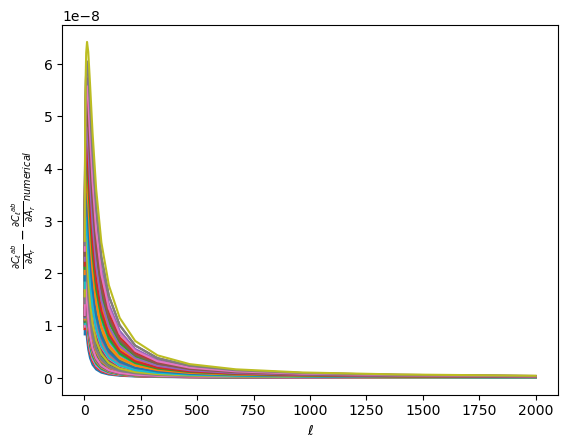

In [12]:
# Numerical-Analytical derivaties differences
for i in range(bin_euclid):
    for j in range(bin_euclid):
        plt.plot(ell, dCldeta_blue1[:,i,j]-dCldeta_blue[:,i,j])

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\frac{{\partial C_\ell}^{ab}}{\partial \eta_b} - \frac{{\partial C_\ell}^{ab}}{\partial \eta_b}_{numerical} $')
plt.show()

for i in range(bin_euclid):
    for j in range(bin_euclid):
        plt.plot(ell, dCldeta_red1[:,i,j]-dCldeta_red[:,i,j])

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\frac{{\partial C_\ell}^{ab}}{\partial \eta_r} - \frac{{\partial C_\ell}^{ab}}{\partial \eta_r}_{numerical} $')
plt.show()


for i in range(bin_euclid):
    for j in range(bin_euclid):
        plt.plot(ell, dCldA_blue1[:,i,j]-dCldA_blue[:,i,j])

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\frac{{\partial C_\ell}^{ab}}{\partial A_b} - \frac{{\partial C_\ell}^{ab}}{\partial A_b}_{numerical} $')
plt.show()

for i in range(bin_euclid):
    for j in range(bin_euclid):
        plt.plot(ell, dCldA_red1[:,i,j]-dCldA_red[:,i,j])

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\frac{{\partial C_\ell}^{ab}}{\partial A_r} - \frac{{\partial C_\ell}^{ab}}{\partial A_r}_{numerical} $')
plt.show()



[[ 4.65594981e+05  2.20425640e+05  2.19339758e+05  2.19373635e+05
   1.08056942e+06  7.33134588e+05  8.66482481e+05  6.24231499e+04
   1.02778546e+05 -3.99562268e+04 -1.09729518e+04]
 [ 2.20425640e+05  1.72326167e+05  1.75692768e+05  1.69811108e+05
   8.22687302e+05  5.81181429e+05  6.60432769e+05  4.62664363e+04
   7.05319244e+04 -3.21088554e+04 -9.33738179e+03]
 [ 2.19339758e+05  1.75692768e+05  1.81705730e+05  1.70860265e+05
   8.57483793e+05  6.00136005e+05  6.90131249e+05  4.77680495e+04
   7.30990677e+04 -3.18285053e+04 -9.35603959e+03]
 [ 2.19373635e+05  1.69811108e+05  1.70860265e+05  1.69931078e+05
   7.90761971e+05  5.65311798e+05  6.34399269e+05  4.44872807e+04
   6.71201692e+04 -3.25522748e+04 -9.38610710e+03]
 [ 1.08056942e+06  8.22687302e+05  8.57483793e+05  7.90761971e+05
   4.21378926e+06  2.85896820e+06  3.31775426e+06  2.55069269e+05
   4.02496764e+05 -1.42947699e+05 -4.15846180e+04]
 [ 7.33134588e+05  5.81181429e+05  6.00136005e+05  5.65311798e+05
   2.85896820e+06  

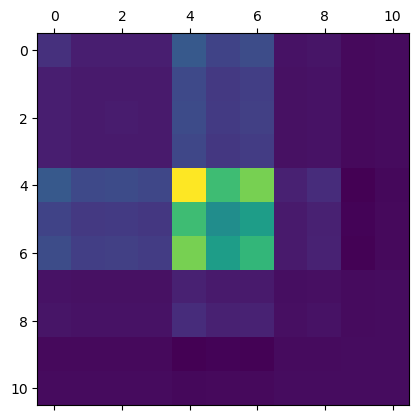

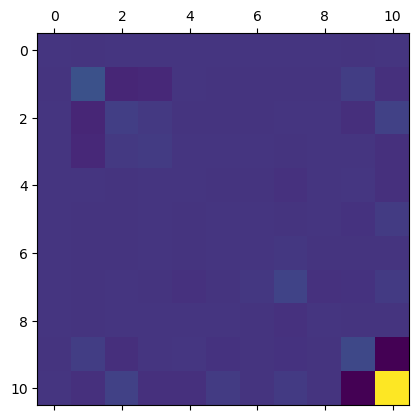

In [13]:
#flattening
dCldA_blue1_flat = np.array([[dCldA_blue1[l,i,j] for i in range(bin_euclid*2) for j in range(i,bin_euclid*2) ]for l in range(bin_l)])
dCldA_red1_flat = np.array([[dCldA_red1[l,i,j] for i in range(bin_euclid*2) for j in range(i,bin_euclid*2) ]for l in range(bin_l)])
dCldeta_blue1_flat = np.array([[dCldeta_blue1[l,i,j] for i in range(bin_euclid*2) for j in range(i,bin_euclid*2) ]for l in range(bin_l)])
dCldeta_red1_flat = np.array([[dCldeta_red1[l,i,j] for i in range(bin_euclid*2) for j in range(i,bin_euclid*2) ]for l in range(bin_l)])
dCldOc_flat = np.array([[dCldOc[l,i,j] for i in range(bin_euclid*2) for j in range(i,bin_euclid*2) ]for l in range(bin_l)])
dClds8_flat = np.array([[dClds8[l,i,j] for i in range(bin_euclid*2) for j in range(i,bin_euclid*2) ]for l in range(bin_l)])
dCldOb_flat = np.array([[dCldOb[l,i,j] for i in range(bin_euclid*2) for j in range(i,bin_euclid*2) ]for l in range(bin_l)])
dCldh_flat = np.array([[dCldh[l,i,j] for i in range(bin_euclid*2) for j in range(i,bin_euclid*2) ]for l in range(bin_l)])
dCldns_flat = np.array([[dCldns[l,i,j] for i in range(bin_euclid*2) for j in range(i,bin_euclid*2) ]for l in range(bin_l)])
dCldw0_flat = np.array([[dCldw0[l,i,j] for i in range(bin_euclid*2) for j in range(i,bin_euclid*2) ]for l in range(bin_l)])
dCldwa_flat = np.array([[dCldwa[l,i,j] for i in range(bin_euclid*2) for j in range(i,bin_euclid*2) ]for l in range(bin_l)])
#Fisher
dCldtheta = np.array([dCldA_blue1_flat,dCldA_red1_flat,dCldeta_blue1_flat,dCldeta_red1_flat,dCldOc_flat,dClds8_flat,dCldOb_flat,dCldh_flat,dCldns_flat,dCldw0_flat,dCldwa_flat])
F_matrix = np.array([np.linalg.multi_dot([dCldtheta[:,l,:],inv_sigma[l,:,:],dCldtheta[:,l,:].T]) for l in range(bin_l)])
F_matrix = np.sum(F_matrix,axis=0)

print(F_matrix)
plt.matshow(F_matrix)
inv_F_matrix = np.linalg.inv(F_matrix)
print(inv_F_matrix)
plt.matshow(inv_F_matrix)
diag_tot = np.sqrt(np.diag(inv_F_matrix))
print(diag_tot)

In [14]:
#Auto-blue
#covarinace calculation
clij_smart_blue = clij_smart[:,0:bin_euclid,0:bin_euclid]
# angular-power-spectra flattening
clij_smart_blue_flat = np.array([[clij_smart_blue[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])
#Covariance blue
aij_blue = np.array([coeff[l,0:bin_euclid,0:bin_euclid]*(clij_smart_blue[l,:,:]+noise[l,0:bin_euclid,0:bin_euclid]) for l in range(bin_l)])
inv_aij_blue =  np.array([ np.linalg.inv(aij_blue[l,:,:]) for l in range(bin_l) ])
sigma_blue = np.array([[0.5*aij_blue[:,i,k]*aij_blue[:,j,l] + 0.5*aij_blue[:,i,l]*aij_blue[:,j,k] for i in range(bin_euclid) for j in range(i,bin_euclid)] for k in range(bin_euclid) for l in range(k,bin_euclid)])
inv_sigma_blue = np.array([np.linalg.inv(sigma_blue[:,:,l]) for l in range(bin_l) ])
#Derivaties selection
dCldA_blue1_blue = dCldA_blue1[:,0:bin_euclid,0:bin_euclid]
dCldeta_blue1_blue = dCldeta_blue1[:,0:bin_euclid,0:bin_euclid]
dCldOc_blue = dCldOc[:,0:bin_euclid,0:bin_euclid]
dCldh_blue = dCldh[:,0:bin_euclid,0:bin_euclid]
dCldns_blue = dCldns[:,0:bin_euclid,0:bin_euclid]
dCldOb_blue = dCldOb[:,0:bin_euclid,0:bin_euclid]
dClds8_blue = dClds8[:,0:bin_euclid,0:bin_euclid]
dCldw0_blue = dCldw0[:,0:bin_euclid,0:bin_euclid]
dCldwa_blue = dCldwa[:,0:bin_euclid,0:bin_euclid]
#Derivaties flattening
dCldA_blue1_blue_flat = np.array([[dCldA_blue1_blue[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])
dCldeta_blue1_blue_flat = np.array([[dCldeta_blue1_blue[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])
dCldOc_blue_flat = np.array([[dCldOc_blue[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])
dCldOb_blue_flat = np.array([[dCldOb_blue[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])
dClds8_blue_flat = np.array([[dClds8_blue[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])
dCldh_blue_flat = np.array([[dCldh_blue[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])
dCldns_blue_flat = np.array([[dCldns_blue[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])
dCldw0_blue_flat = np.array([[dCldw0_blue[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])
dCldwa_blue_flat = np.array([[dCldwa_blue[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])

#Fisher blue
dCldtheta_blue = np.array([dCldA_blue1_blue_flat,dCldeta_blue1_blue_flat,dCldOc_blue_flat,dClds8_blue_flat,dCldOb_blue_flat,dCldh_blue_flat,dCldns_blue_flat,dCldw0_blue_flat,dCldwa_blue_flat])
F_matrix_blue = np.array([np.linalg.multi_dot([dCldtheta_blue[:,l,:],inv_sigma_blue[l,:,:],dCldtheta_blue[:,l,:].T]) for l in range(bin_l)])
F_matrix_blue = np.sum(F_matrix_blue,axis=0)
inv_F_matrix_blue = np.linalg.inv(F_matrix_blue)
#Marginalized errors
diag_blue = np.sqrt(np.diag(inv_F_matrix_blue))
print(diag_blue)



[0.00360708 0.1972859  0.02957866 0.03601375 0.02953733 0.15606208
 0.04492719 0.24811661 1.14359071]


In [15]:
#Auto-red
#Covarinace calculation
clij_smart_red = clij_smart[:,bin_euclid:2*bin_euclid,bin_euclid:2*bin_euclid]
# angular-power-spectra flattening
clij_smart_red_flat = np.array([[clij_smart_red[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])
#Covariance red
aij_red = np.array([coeff[l,bin_euclid:2*bin_euclid,bin_euclid:2*bin_euclid]*(clij_smart_red[l,:,:]+noise[l,bin_euclid:2*bin_euclid,bin_euclid:2*bin_euclid]) for l in range(bin_l)])
inv_aij_red =  np.array([ np.linalg.inv(aij_red[l,:,:]) for l in range(bin_l) ])
sigma_red = np.array([[0.5*aij_red[:,i,k]*aij_red[:,j,l] + 0.5*aij_red[:,i,l]*aij_red[:,j,k] for i in range(bin_euclid) for j in range(i,bin_euclid)] for k in range(bin_euclid) for l in range(k,bin_euclid)])
inv_sigma_red = np.array([np.linalg.inv(sigma_red[:,:,l]) for l in range(bin_l) ])
#Derivaties selection
dCldA_red1_red = dCldA_red1[:,bin_euclid:2*bin_euclid,bin_euclid:2*bin_euclid]
dCldeta_red1_red = dCldeta_red1[:,bin_euclid:2*bin_euclid,bin_euclid:2*bin_euclid]
dCldOc_red = dCldOc[:,bin_euclid:2*bin_euclid,bin_euclid:2*bin_euclid]
dCldh_red = dCldh[:,bin_euclid:2*bin_euclid,bin_euclid:2*bin_euclid]
dCldOb_red = dCldOb[:,bin_euclid:2*bin_euclid,bin_euclid:2*bin_euclid]
dClds8_red = dClds8[:,bin_euclid:2*bin_euclid,bin_euclid:2*bin_euclid]
dCldns_red = dCldns[:,bin_euclid:2*bin_euclid,bin_euclid:2*bin_euclid]
dCldw0_red = dCldw0[:,bin_euclid:2*bin_euclid,bin_euclid:2*bin_euclid]
dCldwa_red = dCldwa[:,bin_euclid:2*bin_euclid,bin_euclid:2*bin_euclid]

#Derivaties flattening
dCldA_red1_red_flat = np.array([[dCldA_red1_red[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])
dCldeta_red1_red_flat = np.array([[dCldeta_red1_red[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])
dCldOc_red_flat = np.array([[dCldOc_red[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])
dCldOb_red_flat = np.array([[dCldOb_red[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])
dClds8_red_flat = np.array([[dClds8_red[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])
dCldh_red_flat = np.array([[dCldh_red[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])
dCldns_red_flat = np.array([[dCldns_red[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])
dCldw0_red_flat = np.array([[dCldw0_red[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])
dCldwa_red_flat = np.array([[dCldwa_red[l,i,j] for i in range(bin_euclid) for j in range(i,bin_euclid) ]for l in range(bin_l)])

#Fisher red
dCldtheta_red = np.array([dCldA_red1_red_flat,dCldeta_red1_red_flat,dCldOc_red_flat,dClds8_red_flat,dCldOb_red_flat,dCldh_red_flat,dCldns_red_flat,dCldw0_red_flat,dCldwa_red_flat])
F_matrix_red = np.array([np.linalg.multi_dot([dCldtheta_red[:,l,:],inv_sigma_red[l,:,:],dCldtheta_red[:,l,:].T]) for l in range(bin_l)])
F_matrix_red = np.sum(F_matrix_red,axis=0)
inv_F_matrix_red = np.linalg.inv(F_matrix_red)
#Marginalized errors
diag_red = np.sqrt(np.diag(inv_F_matrix_red))
print(diag_red)



[0.10744086 0.04620319 0.01855258 0.02407895 0.01816809 0.10083428
 0.02528863 0.09806702 0.45119069]


In [16]:
#Cross-rb
#Covarinace calculation
clij_smart_rb = clij_smart[:,0:bin_euclid,bin_euclid:2*bin_euclid]
clij_smart_br = clij_smart[:,bin_euclid:2*bin_euclid,0:bin_euclid]
# angular-power-spectra flattening
clij_smart_rb_flat = np.array([[[clij_smart_rb[l,j,i] for i in range(bin_euclid)] for j in range(bin_euclid) ]for l in range(bin_l)])
clij_smart_br_flat = np.array([[[clij_smart_br[l,j,i] for i in range(bin_euclid)] for j in range(bin_euclid) ]for l in range(bin_l)])
clij_smart_rb_flat= clij_smart_rb_flat.reshape([bin_l,bin_euclid**2])
clij_smart_br_flat= clij_smart_br_flat.reshape([bin_l,bin_euclid**2])
#Covariance red
aij_rb = np.array([coeff[l,0:bin_euclid,bin_euclid:2*bin_euclid]*(clij_smart_rb[l,:,:]+noise[l,0:bin_euclid,bin_euclid:2*bin_euclid]) for l in range(bin_l)])
aij_br = np.array([coeff[l,bin_euclid:2*bin_euclid,0:bin_euclid]*(clij_smart_br[l,:,:]+noise[l,bin_euclid:2*bin_euclid,0:bin_euclid]) for l in range(bin_l)])
sigma_rb = np.array([[[[0.5*aij_blue[:,i,k]*aij_red[:,j,l] + 0.5*aij_rb[:,i,l]*aij_br[:,j,k] for i in range(bin_euclid)] for j in range(bin_euclid)] for k in range(bin_euclid)] for l in range(bin_euclid)])
sigma_rb = sigma_rb.reshape([bin_euclid**2,bin_euclid**2,bin_l])
inv_sigma_rb = np.array([np.linalg.inv(sigma_rb[:,:,l]) for l in range(bin_l) ])
#Derivaties selection
dCldA_red1_rb = dCldA_red1[:,0:bin_euclid,bin_euclid:2*bin_euclid]
dCldA_blue1_rb = dCldA_blue1[:,0:bin_euclid,bin_euclid:2*bin_euclid]
dCldeta_red1_rb = dCldeta_red1[:,0:bin_euclid,bin_euclid:2*bin_euclid]
dCldeta_blue1_rb = dCldeta_blue1[:,0:bin_euclid,bin_euclid:2*bin_euclid]
dCldOc_rb = dCldOc[:,0:bin_euclid,bin_euclid:2*bin_euclid]
dCldOb_rb = dCldOb[:,0:bin_euclid,bin_euclid:2*bin_euclid]
dClds8_rb = dClds8[:,0:bin_euclid,bin_euclid:2*bin_euclid]
dCldh_rb = dCldh[:,0:bin_euclid,bin_euclid:2*bin_euclid]
dCldns_rb = dCldns[:,0:bin_euclid,bin_euclid:2*bin_euclid]
dCldw0_rb = dCldw0[:,0:bin_euclid,bin_euclid:2*bin_euclid]
dCldwa_rb = dCldwa[:,0:bin_euclid,bin_euclid:2*bin_euclid]

#Derivaties flattening
dCldA_red1_rb_flat = np.array([[[dCldA_red1_rb[l,i,j] for i in range(bin_euclid)] for j in range(bin_euclid) ]for l in range(bin_l)])
dCldeta_red1_rb_flat = np.array([[[dCldeta_red1_rb[l,i,j]  for i in range(bin_euclid)] for j in range(bin_euclid) ]for l in range(bin_l)])
dCldA_blue1_rb_flat = np.array([[[dCldA_blue1_rb[l,i,j] for i in range(bin_euclid)] for j in range(bin_euclid) ]for l in range(bin_l)])
dCldeta_blue1_rb_flat = np.array([[[dCldeta_blue1_rb[l,i,j] for i in range(bin_euclid)] for j in range(bin_euclid) ]for l in range(bin_l)])
dCldOc_rb_flat = np.array([[[dCldOc_rb[l,i,j]  for i in range(bin_euclid)] for j in range(bin_euclid) ]for l in range(bin_l)])
dCldh_rb_flat = np.array([[[dCldh_rb[l,i,j]  for i in range(bin_euclid)] for j in range(bin_euclid) ]for l in range(bin_l)])
dCldOb_rb_flat = np.array([[[dCldOb_rb[l,i,j]  for i in range(bin_euclid)] for j in range(bin_euclid) ]for l in range(bin_l)])
dClds8_rb_flat = np.array([[[dClds8_rb[l,i,j]  for i in range(bin_euclid)] for j in range(bin_euclid) ]for l in range(bin_l)])
dCldns_rb_flat = np.array([[[dCldns_rb[l,i,j]  for i in range(bin_euclid)] for j in range(bin_euclid) ]for l in range(bin_l)])
dCldw0_rb_flat = np.array([[[dCldw0_rb[l,i,j]  for i in range(bin_euclid)] for j in range(bin_euclid) ]for l in range(bin_l)])
dCldwa_rb_flat = np.array([[[dCldwa_rb[l,i,j]  for i in range(bin_euclid)] for j in range(bin_euclid) ]for l in range(bin_l)])

dCldA_red1_rb_flat = dCldA_red1_rb_flat.reshape([bin_l,bin_euclid**2])
dCldeta_red1_rb_flat = dCldeta_red1_rb_flat.reshape([bin_l,bin_euclid**2])
dCldA_blue1_rb_flat = dCldA_blue1_rb_flat.reshape([bin_l,bin_euclid**2])
dCldeta_blue1_rb_flat = dCldeta_blue1_rb_flat.reshape([bin_l,bin_euclid**2])
dCldOc_rb_flat = dCldOc_rb_flat.reshape([bin_l,bin_euclid**2])
dCldOb_rb_flat = dCldOb_rb_flat.reshape([bin_l,bin_euclid**2])
dClds8_rb_flat = dClds8_rb_flat.reshape([bin_l,bin_euclid**2])
dCldh_rb_flat = dCldh_rb_flat.reshape([bin_l,bin_euclid**2])
dCldns_rb_flat = dCldns_rb_flat.reshape([bin_l,bin_euclid**2])
dCldw0_rb_flat = dCldw0_rb_flat.reshape([bin_l,bin_euclid**2])
dCldwa_rb_flat = dCldwa_rb_flat.reshape([bin_l,bin_euclid**2])

#Fisher red-blue
dCldtheta_rb = np.array([dCldA_blue1_rb_flat, dCldA_red1_rb_flat, dCldeta_blue1_rb_flat, dCldeta_red1_rb_flat, dCldOc_rb_flat, dClds8_rb_flat,dCldOb_rb_flat,dCldh_rb_flat,dCldns_rb_flat,dCldw0_rb_flat,dCldwa_rb_flat])
F_matrix_rb = np.array([np.linalg.multi_dot([dCldtheta_rb[:,l,:],inv_sigma_rb[l,:,:],dCldtheta_rb[:,l,:].T]) for l in range(bin_l)])
F_matrix_rb = np.sum(F_matrix_rb,axis=0)
inv_F_matrix_rb = np.linalg.inv(F_matrix_rb)
#Marginalized errors
diag_rb = np.sqrt(np.diag(inv_F_matrix_rb))
print(diag_rb)
print(diag_tot)



[0.01430806 0.32474491 0.19835879 0.13799242 0.02301448 0.02238306
 0.01941078 0.10528708 0.02647163 0.17951877 0.47345993]
[0.00297528 0.0952424  0.05665902 0.0444185  0.01340665 0.01294507
 0.01278168 0.06759808 0.0171556  0.07781758 0.28087073]


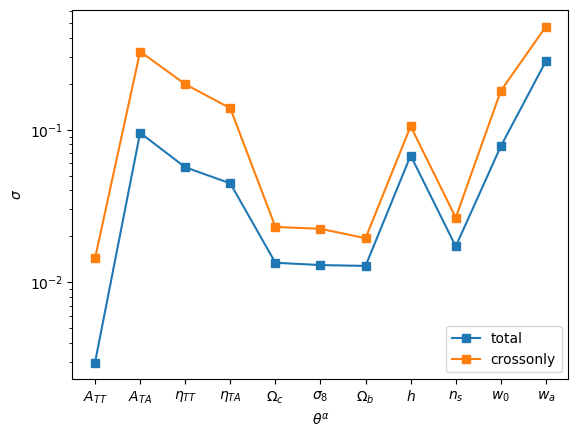

In [17]:
names = [r'$A_{TT}$',r'$A_{TA}$',r'$\eta_{TT}$',r'$\eta_{TA}$',r'$\Omega_c$',r'$\sigma_8$',r'$\Omega_b$',r'$h$',r'$n_s$',r'$w_0$',r'$w_a$']
values = [A_blue,A_red,eta_blue,eta_red,Oc,s8,Omega_b,h,n_s,w0,wa]
diag =np.array([diag_tot,diag_rb])

for i in range(len(diag[:,0])):
    plt.semilogy(names,diag[i,:],marker="s")
plt.xlabel(r'$\theta^\alpha$')
plt.ylabel(r'$\sigma$')
plt.legend(['total','crossonly'])
plt.savefig("total+cross_fishererr_TT+TA.pdf")
plt.show()


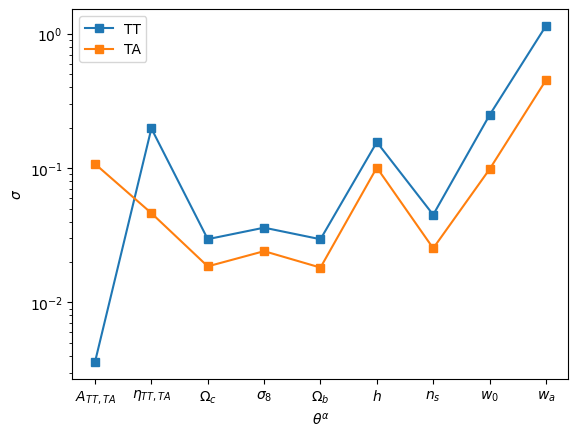

In [18]:
names1 = [r'$A_{TT,TA}$',r'$\eta_{TT,TA}$',r'$\Omega_c$',r'$\sigma_8$',r'$\Omega_b$',r'$h$',r'$n_s$',r'$w_0$',r'$w_a$']
valuesr = [A_red,eta_red,Oc,s8,Omega_b,h,n_s,w0,wa]
valuesb = [A_blue,eta_blue,Oc,s8,Omega_b,h,n_s,w0,wa]
values1 = np.array([valuesb,valuesr])
diag1 =np.array([diag_blue,diag_red])

for i in range(len(diag[:,0])):
    plt.semilogy(names1,diag1[i,:],marker="s")
plt.xlabel(r'$\theta^\alpha$')
plt.ylabel(r'$\sigma$')
plt.legend(['TT','TA'])
plt.savefig("autoblue+autored_fishererr_TT+TA.pdf")
plt.show()


/tmp/ipykernel_233463/2864275811.py:4: RuntimeWarning: divide by zero encountered in divide
  points=np.abs(diag*100/values)


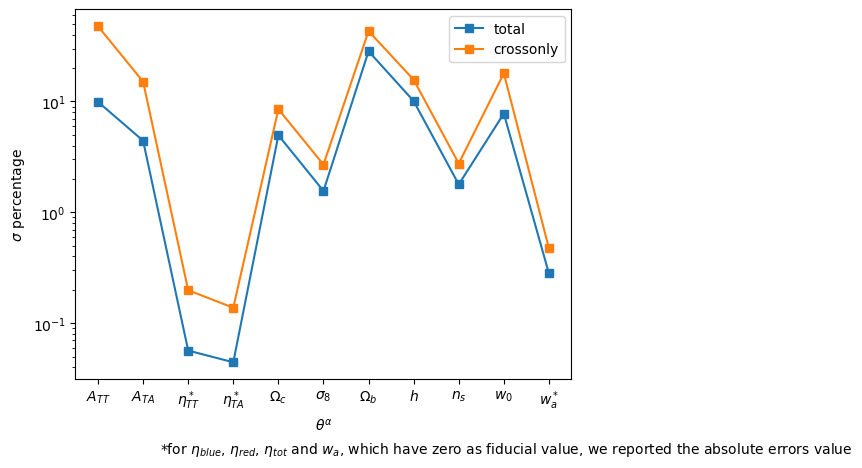

[[9.91760386e+00 4.42987904e+00 5.66590161e-02 4.44184957e-02
  4.96542459e+00 1.55964680e+00 2.84037408e+01 1.00892655e+01
  1.78704203e+00 7.78175837e+00 2.80870728e-01]
 [4.76935438e+01 1.51044145e+01 1.98358792e-01 1.37992420e-01
  8.52388158e+00 2.69675392e+00 4.31350732e+01 1.57144897e+01
  2.75746125e+00 1.79518766e+01 4.73459928e-01]]


In [19]:
names = [r'$A_{TT}$',r'$A_{TA}$',r'$\eta_{TT}^*$',r'$\eta_{TA}^*$',r'$\Omega_c$',r'$\sigma_8$',r'$\Omega_b$',r'$h$',r'$n_s$',r'$w_0$',r'$w_a^*$']
values = [A_blue,A_red,eta_blue,eta_red,Oc,s8,Omega_b,h,n_s,w0,wa]
diag =np.array([diag_tot,diag_rb])
points=np.abs(diag*100/values)
points[0,3]= diag[0,3]
points[1,3]= diag[1,3]
points[0,2]= diag[0,2]
points[1,2]= diag[1,2]
points[0,10]= diag[0,10]
points[1,10]= diag[1,10]

for i in range(len(diag[:,0])):
    plt.semilogy(names,points[i,:],marker="s")
    
plt.xlabel(r'$\theta^\alpha$')
plt.ylabel(r'$\sigma$ percentage')
plt.legend(['total','crossonly'])
textstr = r'*for $\eta_{blue}$, $\eta_{red}$, $\eta_{tot}$ and $w_a$, which have zero as fiducial value, we reported the absolute errors value'
plt.annotate(textstr, xy=(0.17, -0.2), xycoords='axes fraction',fontsize=10)
plt.savefig("total+cross_fishererr_TT+TA_per.pdf")
plt.show()
print(points)

/tmp/ipykernel_233463/787664140.py:6: RuntimeWarning: divide by zero encountered in divide
  points1 = np.abs(diag1*100/values1)


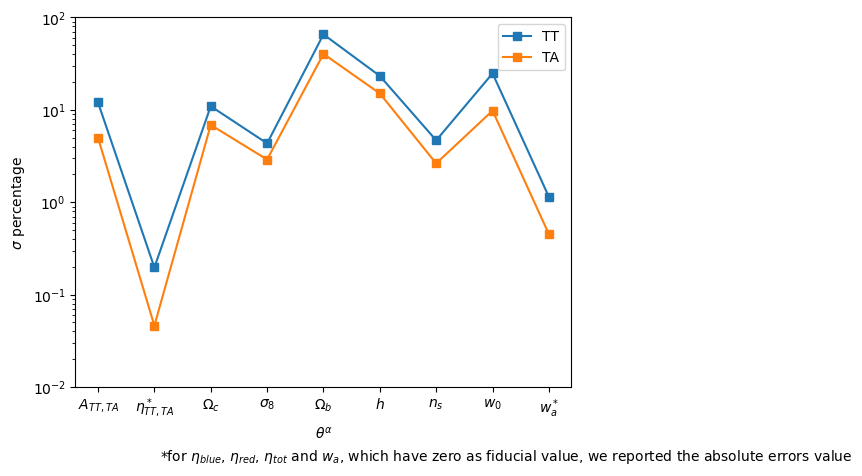

In [20]:
names1 = np.array([r'$A_{TT,TA}$',r'$\eta_{TT,TA}^*$',r'$\Omega_c$',r'$\sigma_8$',r'$\Omega_b$',r'$h$',r'$n_s$',r'$w_0$',r'$w_a^*$'])
valuesr = [A_red,eta_red,Oc,s8,Omega_b,h,n_s,w0,wa]
valuesb = [A_blue,eta_blue,Oc,s8,Omega_b,h,n_s,w0,wa]
values1 = np.array([valuesb,valuesr])
diag1 =np.array([diag_blue,diag_red])
points1 = np.abs(diag1*100/values1)
points1[0,1]= diag1[0,1]
points1[1,1]= diag1[1,1]
points1[0,8]= diag1[0,8]
points1[1,8]= diag1[1,8]

for i in range(len(diag[:,0])):
    plt.semilogy(names1,points1[i,:],marker="s")
plt.xlabel(r'$\theta^\alpha$')
plt.ylabel(r'$\sigma$ percentage')
plt.legend(['TT','TA'])
plt.ylim(0.01,100)
textstr = r'*for $\eta_{blue}$, $\eta_{red}$, $\eta_{tot}$ and $w_a$, which have zero as fiducial value, we reported the absolute errors value'
plt.annotate(textstr, xy=(0.17, -0.2), xycoords='axes fraction',fontsize=10)
plt.savefig("autoblue+autored_fishererr_TT+TA_per.pdf")
plt.show()


In [21]:
print(points.shape)
points1=points1.flatten()
print(points.shape)

(2, 11)
(2, 11)


In [22]:
points2=np.insert(points1,1,0)
points2=np.insert(points2,3,0)
points2=np.insert(points2,11,0)
points2=np.insert(points2,13,0)
shape=[2,11]
points2=np.reshape(points2,shape)

In [23]:
print(points2.shape)
print(points.shape)
print(names1.shape)

(2, 11)
(2, 11)
(9,)


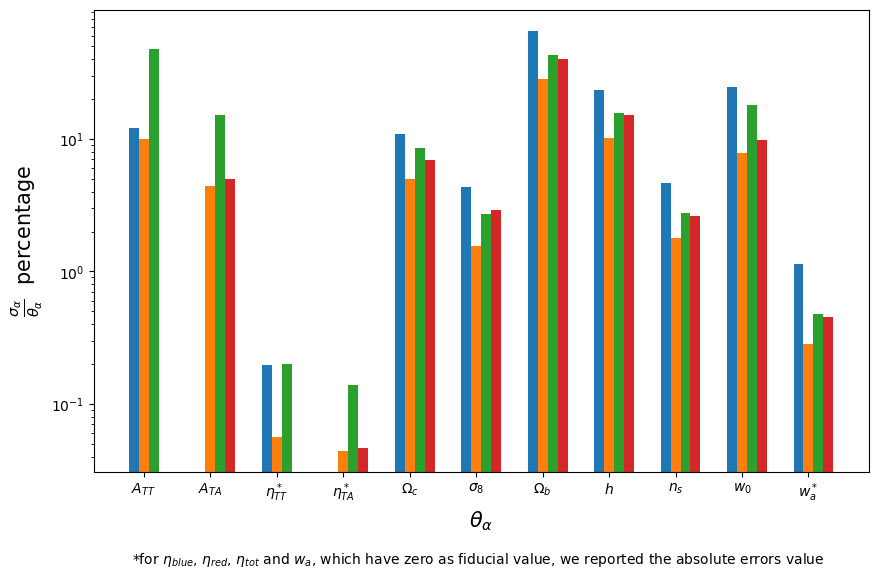

In [24]:


data = {
    'TT': tuple(points2[0,:]),
    'total ': tuple(points[0,:]),
    'cross': tuple(points[1,:]),
    'TA': tuple(points2[1,:]),
    
    
    
}

x = np.arange(len(names))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10,6))


for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$\frac{\sigma_\alpha}{\theta_\alpha}$  percentage', fontsize=15)
ax.set_xlabel(r'$\theta_\alpha$', fontsize=15)
#ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, names)
#ax.legend(loc='upper left', ncols=4)
ax.set_yscale('log')
textstr = r'*for $\eta_{blue}$, $\eta_{red}$, $\eta_{tot}$ and $w_a$, which have zero as fiducial value, we reported the absolute errors value'
ax.annotate(textstr, xy=(0.05, -0.2), xycoords='axes fraction',fontsize=10)
plt.savefig('errors_hist_TT+TA.pdf', bbox_inches="tight")